<a href="https://colab.research.google.com/github/anfansler/IMSE641/blob/main/Part_16_and_23_Layer_200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Alexandria Fansler A9 Final Project.ipynb

---



# layer 200 x bar and r charts

In [ ]:
# Importing Necessary Libraries
import numpy as np
from skimage import data, io, filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from PIL import Image 
# to validate iid, we do a QQ plot, e.g. Normal test shown below
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm
import statistics
from matplotlib.ticker import PercentFormatter
import pandas as pd
import statistics
plt.style.use('seaborn-colorblind')

<ipython-input-2-cbfa3fe52fdf>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [ ]:
from pandas.io.formats.info import DataFrameInfoPrinter
# to read in the data make sure that you use the raw format in Github
# the following input statement is needed to use pandas dataframe feature
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/243_layers_w_defect_641.csv', sep=',',na_values='.')
dataAll=[data[['s_d2','s_d3','s_d4','s_d5','s_d6','s_d7','s_d8','s_d9','s_d10',	's_d12', 's_d16',	's_d19',	's_d20',	's_d23',	's_d24',	's_d26',	's_d28']]]
data 

data200= [data[['s_d16','s_d23']][data['layer'] < 200]]
data200

[     s_d16  s_d23
 0       62     67
 1      567    587
 2      591    569
 3      625    573
 4      642    595
 ..     ...    ...
 195    698   2262
 196    678   2355
 197    736   2512
 198    734   2578
 199    725   2636
 
 [200 rows x 2 columns]]

In [ ]:
x=np.reshape(data200, (200,2))
x

array([[  62,   67],
       [ 567,  587],
       [ 591,  569],
       [ 625,  573],
       [ 642,  595],
       [ 591,  534],
       [ 571,  532],
       [ 610,  575],
       [ 577,  612],
       [ 568,  631],
       [ 584,  601],
       [ 522,  628],
       [ 604,  656],
       [ 593,  645],
       [ 561,  623],
       [ 567,  663],
       [ 555,  653],
       [ 634,  699],
       [ 614,  741],
       [ 609,  697],
       [ 629,  724],
       [ 633,  722],
       [ 693,  772],
       [ 710,  774],
       [ 610,  750],
       [ 695,  767],
       [ 705,  775],
       [ 669,  721],
       [ 660,  720],
       [ 652,  719],
       [ 662,  735],
       [ 645,  760],
       [ 650,  731],
       [ 683,  762],
       [ 668,  726],
       [ 658,  736],
       [ 653,  762],
       [ 657,  719],
       [ 654,  701],
       [ 647,  776],
       [ 640,  711],
       [ 668,  768],
       [ 628,  701],
       [ 675,  744],
       [ 650,  721],
       [ 629,  741],
       [ 643,  721],
       [ 658,

In [ ]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = [] 

In [ ]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
#print(x_bar)
#print(r)
m=len(x_bar)
print('points in x, ', m)

points in x,  200


[Text(0.5, 0, 'Group'), Text(0, 0.5, 'Range')]

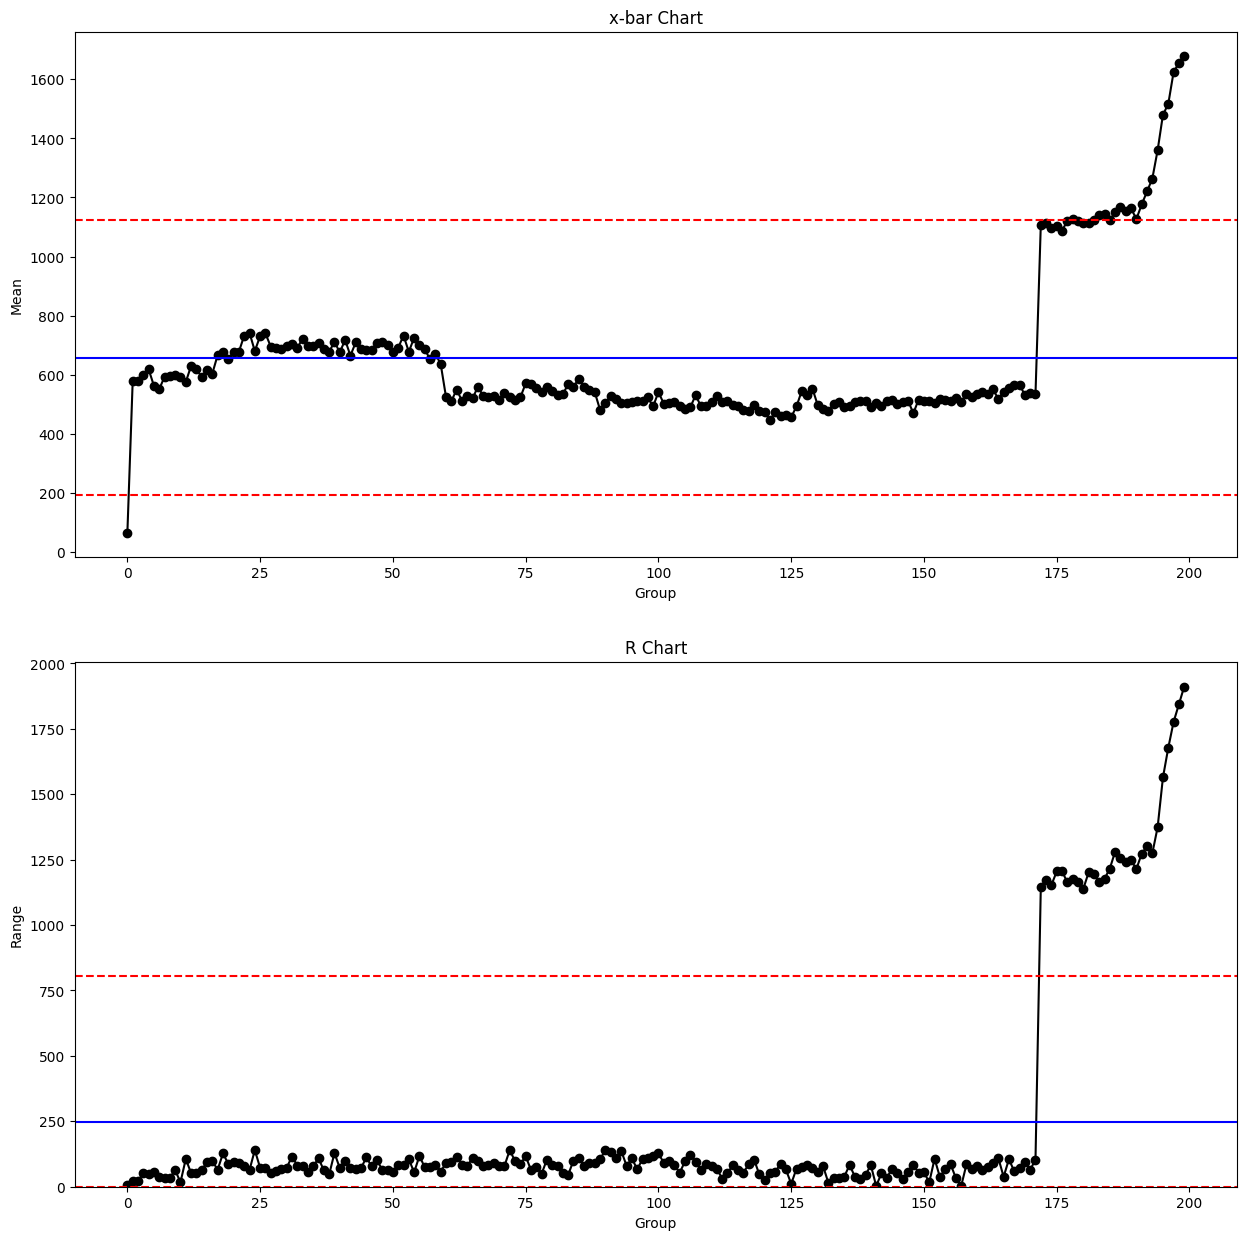

In [ ]:
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
# Chart parameters A2, D3, and D4 see the ref for other sample size
A2=1.880 #n=2
D3=0 #n=2
D4=3.267 #n=2

axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

In [ ]:
# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+A2*statistics.mean(r) or group < statistics.mean(x_bar)-A2*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

Group 0 out of mean control limits!
Group 178 out of mean control limits!
Group 182 out of mean control limits!
Group 183 out of mean control limits!
Group 184 out of mean control limits!
Group 185 out of mean control limits!
Group 186 out of mean control limits!
Group 187 out of mean control limits!
Group 188 out of mean control limits!
Group 189 out of mean control limits!
Group 190 out of mean control limits!
Group 191 out of mean control limits!
Group 192 out of mean control limits!
Group 193 out of mean control limits!
Group 194 out of mean control limits!
Group 195 out of mean control limits!
Group 196 out of mean control limits!
Group 197 out of mean control limits!
Group 198 out of mean control limits!
Group 199 out of mean control limits!


In [ ]:
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > D4*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

Group 172 out of range cotrol limits!
Group 173 out of range cotrol limits!
Group 174 out of range cotrol limits!
Group 175 out of range cotrol limits!
Group 176 out of range cotrol limits!
Group 177 out of range cotrol limits!
Group 178 out of range cotrol limits!
Group 179 out of range cotrol limits!
Group 180 out of range cotrol limits!
Group 181 out of range cotrol limits!
Group 182 out of range cotrol limits!
Group 183 out of range cotrol limits!
Group 184 out of range cotrol limits!
Group 185 out of range cotrol limits!
Group 186 out of range cotrol limits!
Group 187 out of range cotrol limits!
Group 188 out of range cotrol limits!
Group 189 out of range cotrol limits!
Group 190 out of range cotrol limits!
Group 191 out of range cotrol limits!
Group 192 out of range cotrol limits!
Group 193 out of range cotrol limits!
Group 194 out of range cotrol limits!
Group 195 out of range cotrol limits!
Group 196 out of range cotrol limits!
Group 197 out of range cotrol limits!
Group 198 ou

# CUSUM layer 100

In [ ]:
# np flattern() function is used to convert a 2D matrix into 1D vector
# n=1 is use for CUSUM chart
x1=x.flatten()

In [ ]:
# process mean is computed assuming it is stationary
x1.mean()

658.0125

In [ ]:
# this class define how tabular CUSUM chart is plotted
# input: h, k, process mean mu & process standard deviation sigma & delta
# h is unit away from the center line; H=h * sigma
# k is delta/2; K= k * sigma
# delta is the mu1 - mu0, the shift magnitude to be detected
# reference K= (delta/2)*sigma
class CUSUM:
    def fit(self,data, h, k, mu, sigma):
        
        self.X     = data
        self.cplus     = np.zeros(len(data))
        self.cminus     = np.zeros(len(data))
        self.H = h * sigma
        self.K = k * sigma
        self.mean  = mu
        self.sigma = sigma
        self.cplus[0]  = 0
        self.cminus[0] = 0
        for i in range(1,len(self.X)):
            self.cplus[i] = max(0, self.X[i] -(self.mean+self.K) + self.cplus[i-1]) 
            self.cminus[i] = max(0, (self.mean-self.K) - self.X[i] + self.cminus[i-1])

    def  ControlChart(self):
        # all CUSUM parameters will be imported from def fit
        ucl = np.zeros(len(self.X))
        lcl = np.zeros(len(self.X))
        # I   = np.arange(1,len(self.X)+1)
        
        for i in range(len(self.X)):
            ucl[i] = self.H
            lcl[i] = -1*self.H
              
        plt.figure(figsize=(15,5))
        plt.plot(self.cplus,marker="o",color="k",label="$C+$")
        plt.plot(-1*self.cminus,marker="x",color="k",label="$C-$")
        plt.plot(np.zeros(len(self.X)),color="k",alpha=0.35)
        plt.plot(ucl,color="r",label="UCL {}".format(ucl[len(ucl)-1].round(2)))
        plt.plot(lcl,color="r",label="LCL {}".format(lcl[len(lcl)-1].round(2)))
        plt.title("CUSUM Conrol Chart")
        plt.legend(loc="upper left")
        plt.show()

In [ ]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = []

In [ ]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
# since append is used here, if this block of codes is executed twice, m is doubled
for group in x:
    x_bar.append(group.mean())
    s.append(np.std(group))

m=len(x_bar)
print('points in plotting dataset, ', m)

points in plotting dataset,  200


In [ ]:
# use the phase I data to compute mean and sigma
# S-bar is used here but you can also use R-bar or MR for sigma estimate
#c4 is 0.9727 for n=5
c4=0.7979
x_bar_bar=statistics.mean(x_bar)
s_bar=statistics.mean(s)
sigma_hat=s_bar/c4
print('process mean is, ', x_bar_bar)
print('process standard deviation is, ', sigma_hat)

process mean is,  658.0125
process standard deviation is,  155.02882566737685


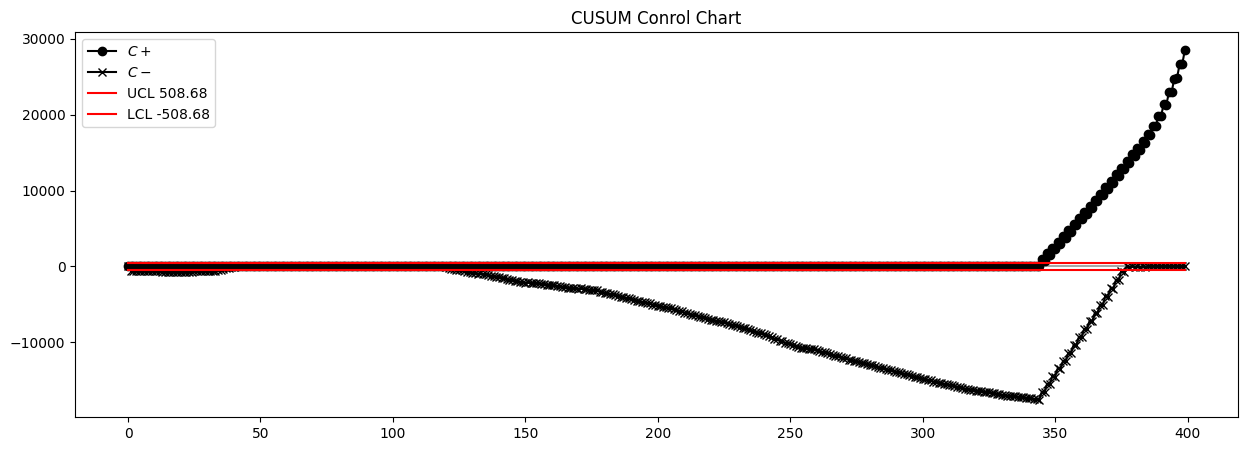

In [ ]:
# This chart is for either Phase I or Phase II assuming all mean and sigma are estimated
# In this block, only Phase I data is plotted
# CUSUM chart parameters are K, mu, sigma
# if mu and sigma are known or can be estimated, the above estimations using x-bar and S are not necessary
chart = CUSUM()
chart.fit(data=x1, h=4, k=0.5, mu=658.01, sigma=127.17)
chart.ControlChart()